In [0]:
pip install pyodbc


Python interpreter will be restarted.
Collecting pyodbc
 Downloading pyodbc-4.0.34.tar.gz (271 kB)
Building wheels for collected packages: pyodbc
 Building wheel for pyodbc (setup.py): started
 Building wheel for pyodbc (setup.py): finished with status 'done'
 Created wheel for pyodbc: filename=pyodbc-4.0.34-cp37-cp37m-linux_x86_64.whl size=285824 sha256=e4bf5c79de7e1c7d6744ec6400a6cab48891f31d78dcd5d4185fd55fb1998da6
 Stored in directory: /root/.cache/pip/wheels/6a/c1/35/59f2b2a756ed8cce1e3c368efcce2399621c86dde8d52fcf00
Successfully built pyodbc
Installing collected packages: pyodbc
Successfully installed pyodbc-4.0.34
WARNING: You are using pip version 20.0.2; however, version 22.1.2 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-4c7af289-4328-4e82-9163-e9d009af27ac/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17

% Total % Received % Xferd Average Speed Time Time Time Current
 Dload Upload Total Spent Left Speed

 0 0 0 0 0 0 0 0 --:--:-- --:--:-- --:--:-- 0Warning: apt-key output should not be parsed (stdout is not a terminal)

100 983 100 983 0 0 7561 0 --:--:-- --:--:-- --:--:-- 7620
OK
 % Total % Received % Xferd Average Speed Time Time Time Current
 Dload Upload Total Spent Left Speed

 0 0 0 0 0 0 0 0 --:--:-- --:--:-- --:--:-- 0
100 79 100 79 0 0 686 0 --:--:-- --:--:-- --:--:-- 686
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Get:2 https://packages.microsoft.com/ubuntu/16.04/prod xenial InRelease [4,011 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 http://repos.azulsystems.com/ubuntu stable InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 http://repos.azulsystems.com/ubuntu stable Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:8 https://repos.azul.com/zulu/deb stable InRelease
Get:9 https://packages.microsoft.com/ubuntu/16.04/prod xenial/main amd64 Packages [310 kB]
Fetched 314 kB in 1s (335 kB/s)
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
The following packages were automatically installed and are no longer required:
 libcap2-bin libpam-cap zulu-8 zulu-repo
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
 msodbcsql17
0 upgraded, 1 newly installed, 0 to remove and 17 not upgraded.
Need to get 744 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 https://packages.microsoft.com/ubuntu/16.04/prod xenial/main amd64 msodbcsql17 amd64 17.8.1.1-1 [744 kB]
debconf: delaying package configuration, since apt-utils is not installed
Fetched 744 kB in 0s (3,083 kB/s)
Selecting previously unselected package msodbcsql17.
(Reading database ... 
(Reading database ... 5%
(Reading database ... 10%
(Reading database ... 15%
(Reading database ... 20%
(Reading database ... 25%
(Reading database ... 30%
(Reading database ... 35%
(Reading database ... 40%
(Reading database ... 45%
(Reading database ... 50%
(Reading database ... 55%
(Reading database ... 60%
(Reading database ... 65%
(Reading database ... 70%
(Reading database ... 75%
(Reading database ... 80%
(Reading database ... 85%
(Reading database ... 90%
(Reading database ... 95%
(Reading database ... 100%
(Reading database ... 91379 files and directories currently installed.)
Preparing to unpack .../msodbcsql17_17.8.1.1-1_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Unpacking msodbcsql17 (17.8.1.1-1) ...
Setting up msodbcsql17 (17.8.1.1-1) ...

In [0]:
#import library
import pyodbc
server = 'anoserver.database.windows.net'
database = 'dbano'
username = 'anoadmin'
password = 'mypassword1!'  
if(len(pyodbc.drivers())>0):
    drivers = [item for item in pyodbc.drivers()]
    driver = drivers[-1]
    print("driver:{}".format(driver))
    with pyodbc.connect('DRIVER='+driver+';SERVER=tcp:'+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password) as conn:
        with conn.cursor() as cursor:
            cursor.execute("SELECT TOP 3 name, collation_name FROM sys.databases")
            row = cursor.fetchone()
            while row:
                print (str(row[0]) + " " + str(row[1]))
                row = cursor.fetchone()
else:
    print(len(pyodbc.drivers()))
    




    
        
        
        
            
            

driver:ODBC Driver 17 for SQL Server
master SQL_Latin1_General_CP1_CI_AS
dbano SQL_Latin1_General_CP1_CI_AS

In [0]:
import pandas
query="Select * from [dbo].[finalstock1]"
res = cursor.execute(query)
res = cursor.fetchall()
df = pandas.DataFrame((tuple(t) for t in res), columns=['Date', 'High', 'Low', 'colOpen', 'colClose', 'Volume', 'Adj_Close', 'company_name'])
df

,Date,High,Low,colOpen,colClose,Volume,Adj_Close,company_name
0,2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100.0,753.669983,AMAZON
1,2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500.0,757.179993,AMAZON
2,2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100.0,780.450012,AMAZON
3,2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200.0,795.989990,AMAZON
4,2017-01-09,801.770020,791.770020,798.000000,796.919983,3446100.0,796.919983,AMAZON
...,...,...,...,...,...,...,...,...
6328,2020-11-25,448.480011,433.329987,435.850006,443.720001,8763700.0,443.720001,ZOOM
6329,2020-11-27,472.040009,449.000000,453.989990,471.609985,7276400.0,471.609985,ZOOM
6330,2020-11-30,486.829987,460.000000,485.700012,478.359985,16646500.0,478.359985,ZOOM
6331,2020-12-01,434.989990,401.720001,434.720001,406.309998,20837500.0,406.309998,ZOOM


In [0]:

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline


In [0]:

df = df['colClose'].to_frame()
df['MA5'] = df['colClose'].rolling(5).mean()
df.dropna(inplace=True)
df


,colClose,MA5
4,796.919983,776.841992
5,795.900024,785.288000
6,799.020020,793.656006
7,813.640015,800.294006
8,817.140015,804.524011
...,...,...
6328,443.720001,431.088000
6329,471.609985,442.551996
6330,478.359985,450.303992
6331,406.309998,445.509991


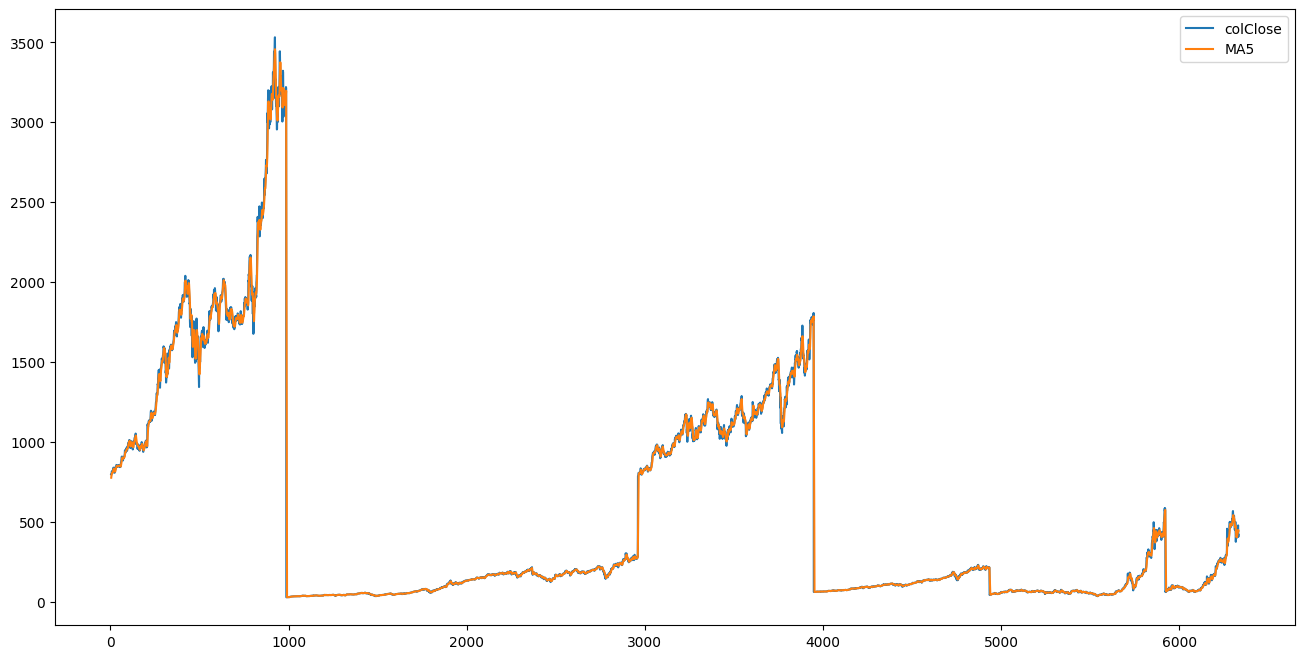

In [0]:
#Bonus
#plotting colClose and MA5

df[['colClose', 'MA5']].plot(label='average',
								figsize=(16, 8))
